In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
!cd

C:\Users\Janus\Datascience\Assignments\Sessions


### Prepare data


In [3]:
# Load input data
# x = pd.read_csv('../data/sales.csv', delimiter=',')
# X = x.values
# X = X[:,1:]

df = pd.read_csv('C:/Users/Janus/Datascience/Assignments/Sessions/Data/small_companies.csv', delimiter=',')
df

longi_lati = df[["latitude", 'longitude']]

print(longi_lati)


     latitude  longitude
0   55.674321  12.591612
1   55.708655  12.591288
2   55.689618  12.590014
3   56.197849  10.173879
4   55.924279  12.283561
5   55.395903  10.384222
6   55.754555  12.455185
7   55.736130  12.393105
8   55.682038  12.583964
9   55.733204  12.391164
10  55.667802  12.618812
11  55.730673  12.463418
12  55.679721  12.579087
13  55.274825  14.800772
14  55.672322  12.588527
15  55.660184  12.514151
16  55.653577  12.544796
17  55.723369  12.376387
18  55.702334  12.557268
19  55.749182  12.294416
20  57.441412  10.494082
21  55.734142  12.380579
22  55.649056  12.417581


In [4]:
X = longi_lati.values

X

array([[55.674321, 12.591612],
       [55.708655, 12.591288],
       [55.689618, 12.590014],
       [56.197849, 10.173879],
       [55.924279, 12.283561],
       [55.395903, 10.384222],
       [55.754555, 12.455185],
       [55.73613 , 12.393105],
       [55.682038, 12.583964],
       [55.733204, 12.391164],
       [55.667802, 12.618812],
       [55.730673, 12.463418],
       [55.679721, 12.579087],
       [55.274825, 14.800772],
       [55.672322, 12.588527],
       [55.660184, 12.514151],
       [55.653577, 12.544796],
       [55.723369, 12.376387],
       [55.702334, 12.557268],
       [55.749182, 12.294416],
       [57.441412, 10.494082],
       [55.734142, 12.380579],
       [55.649056, 12.417581]])

### Plot data longitude and latitude

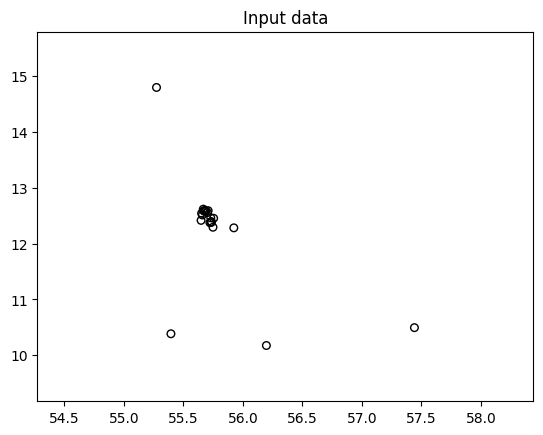

In [7]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

### Determine the number of clusters

In [28]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
dist = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    dist.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [0.566147382239869, 0.30197632031999133, 0.18910902704511284, 0.12578479915521806, 0.08973815943009819, 0.038900204015084865, 0.028104020652748335, 0.022904252941879984, 0.01943639244033077, 0.566147382239869, 0.30197632031999133, 0.18910902704511284, 0.12578479915521806, 0.08973815943009819, 0.038900204015084865, 0.028104020652748335, 0.02458411728479943, 0.01943639244033077]


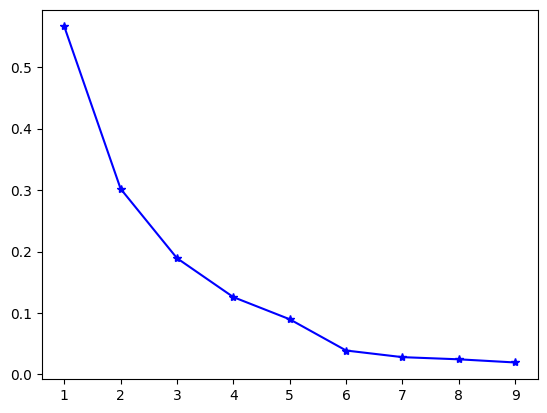

In [22]:
plt.plot(K, dist, 'b*-')
plt.show()

In [25]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.8132330945353184

Number of clusters = 3
Silhouette score = 0.8268472937225821

Number of clusters = 4
Silhouette score = 0.8122609957958076

Number of clusters = 5
Silhouette score = 0.7687993085566257

Number of clusters = 6
Silhouette score = 0.5229646239656511

Number of clusters = 7
Silhouette score = 0.5221105481674985

Number of clusters = 8
Silhouette score = 0.46919443792248117

Number of clusters = 9
Silhouette score = 0.45826159906118596


In [29]:
numclust = 5

In [33]:
# Create an instance of KMeans classifier
mymodel = KMeans(init='k-means++', n_clusters=numclust, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [34]:
mymodel.fit(X)

KMeans(n_clusters=5, n_init=20)

In [35]:
mymodel.labels_

array([0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0,
       0])

In [37]:
mymodel.cluster_centers_

array([[55.71185063, 12.48499553],
       [55.395903  , 10.384222  ],
       [55.274825  , 14.800772  ],
       [57.441412  , 10.494082  ],
       [56.197849  , 10.173879  ]])

In [42]:
y=mymodel.predict(X)

Cluster  0 :  (19, 2)


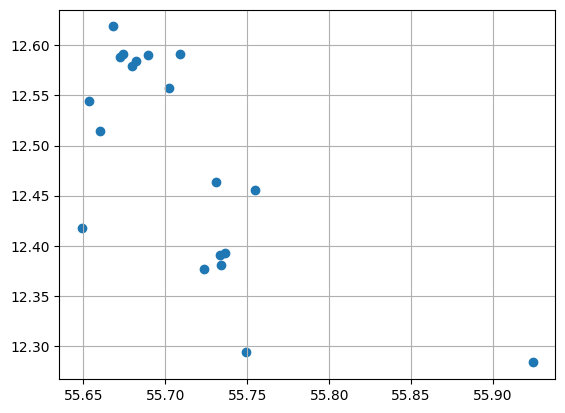

Cluster  1 :  (1, 2)


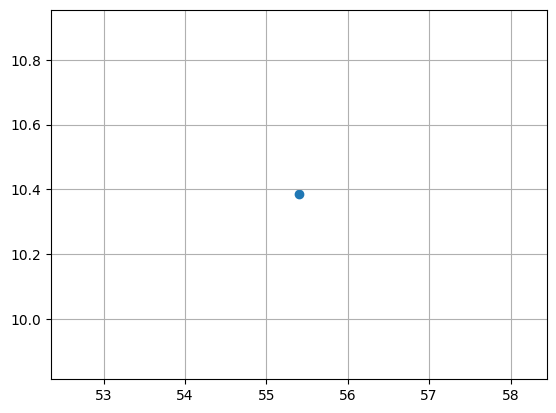

Cluster  2 :  (1, 2)


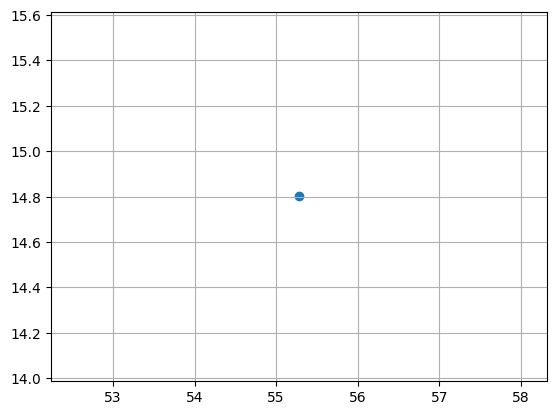

Cluster  3 :  (1, 2)


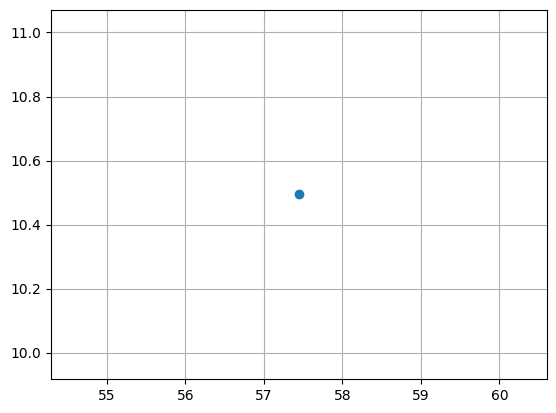

Cluster  4 :  (1, 2)


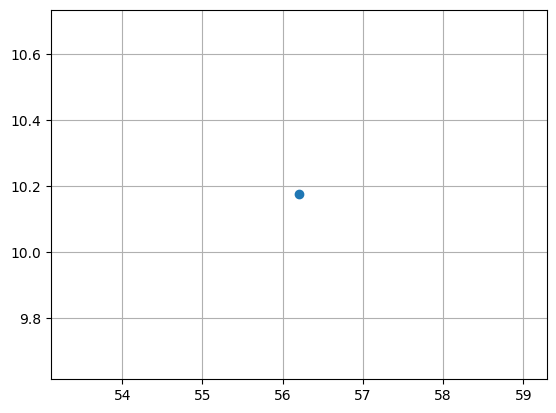

In [43]:
# Split the clusters, for demo purpose only
for i in range(numclust):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

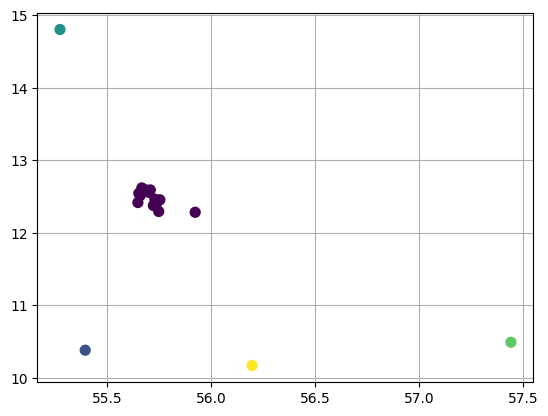

In [44]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [46]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [48]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = mymodel.predict(np.c_[xx,yy])
labels = labels.reshape(x_vals.shape)

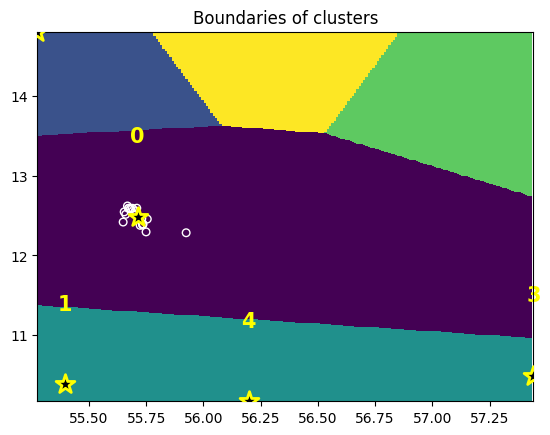

In [50]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 

# plot the centroids
centers = mymodel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()